# Mamoas Detection
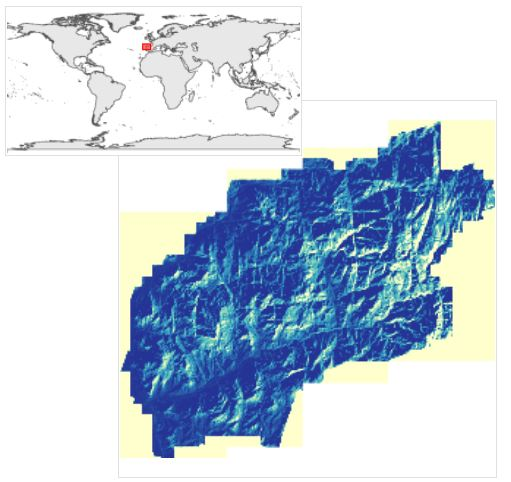

In [10]:
!python -m pip show tensorflow

Name: tensorflow
Version: 2.8.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\fabri\anaconda3\envs\env\lib\site-packages
Requires: libclang, opt-einsum, six, gast, wrapt, grpcio, keras-preprocessing, absl-py, setuptools, tf-estimator-nightly, astunparse, tensorflow-io-gcs-filesystem, protobuf, flatbuffers, termcolor, keras, google-pasta, typing-extensions, tensorboard, numpy, h5py
Required-by: 


In [1]:
# Import relevant libraries
from tensorflow.keras.layers import Input, Activation, ZeroPadding2D, Lambda, Dense, Flatten,Dropout,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import glob
import os.path
from pathlib import Path
import shutil
from os.path import exists
import seaborn as sns
import random

## Image Pre-Processing

In [2]:
# read all images of classes and convert .tif to .jpg format
path = "C:\\Users\\fabri\\Downloads\\folder data\\dataset_cnn\\"

data = []
width = 80
height = 80
dim = (width, height)

labels = ['mamoa', 'not_mamoa']
        
if(os.path.exists(path)):  
    for label in labels:
        p = os.path.join(path, label)
        class_num = labels.index(label)
        for img in os.listdir(p):
          img_array = cv2.imread(os.path.join(p,img), cv2.IMREAD_GRAYSCALE)
          resized = cv2.resize(img_array, dim, interpolation = cv2.INTER_AREA)
          data.append([resized, class_num])
else:
    print("This directory: "+path+" doesn't exist.")

# shuffle the dataset
random.shuffle(data)

# extract the features and label
x = []
y = []
for features, label in data:
    x.append(features)
    y.append(label)

x = np.array(x).reshape(-1, height, width, 1)
y = np.array(y)

# Normalize the values of features
x = x/255

C:\Users\fabri\anaconda3\envs\env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

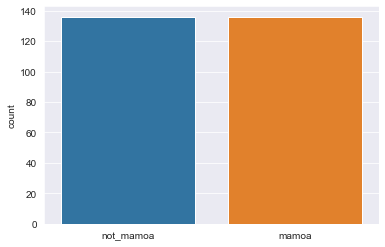

In [3]:
count = []
for i in range(0, len(data)):
    if (data[i][1] == 0):
        count.append('mamoa')
    else:
        count.append('not_mamoa')

sns.set_style('darkgrid')
sns.countplot(count)

# examples of two classes
#plt.figure(figsize = (5,5))
#plt.imshow(x[2], cmap='gray')
#if y[2] == 0: plt.title('mamoa')
#else: plt.title('not mamoa')

#plt.figure(figsize = (5,5))
#plt.imshow(x[10], cmap='gray')
#if y[10] == 0: plt.title('mamoa')
#else: plt.title('not mamoa')
 

## Train-Test-Val split

train, val, test: (163, 80, 80, 1) (55, 80, 80, 1) (54, 80, 80, 1)


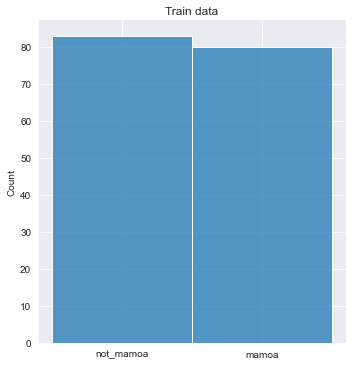

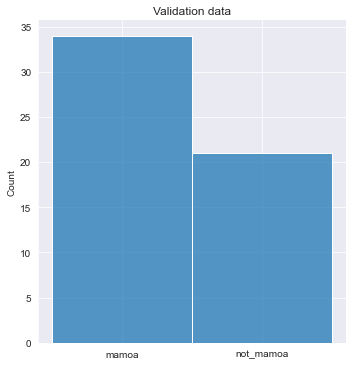

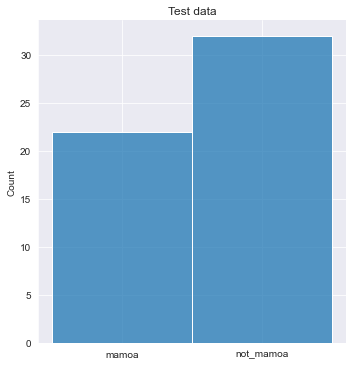

In [4]:
# split the dataset in train, validation and test using 60, 20, 20, respectively
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.6, test_size=0.4, random_state=4)
x_test,x_val,y_test,y_val=train_test_split(x_test,y_test,test_size=0.5, random_state=4)

print("train, val, test:",x_train.shape,x_val.shape,x_test.shape)

count = []
for i in range(0, len(y_train)):
    if (y_train[i] == 0):
        count.append('mamoa')
    else:
        count.append('not_mamoa')
sns.set_style('darkgrid')
sns.displot(count).set(title="Train data") 

count = []
for i in range(0, len(y_val)):
    if (y_val[i] == 0):
        count.append('mamoa')
    else:
        count.append('not_mamoa')
sns.set_style('darkgrid')
sns.displot(count).set(title="Validation data") 

count = []
for i in range(0, len(y_test)):
    if (y_test[i] == 0):
        count.append('mamoa')
    else:
        count.append('not_mamoa')
sns.set_style('darkgrid')
sns.displot(count).set(title="Test data") 

## Model Building

In [21]:
def MamoasModel(input_shape):
    """
    Implementation of the model.
    
    Arguments:
    input_shape -- shape of the images of the dataset
    
    Returns:
    model -- a Model() instance in Keras
    """
    # Use the suggested model in the text above to get started, and run through the whole
    # exercise once. Then come back and add more BLOCKS. 
    

    # BLOCK 1: CONV -> BN -> RELU -> MAXP
    X_input = Input(input_shape)
    X = ZeroPadding2D((3, 3))(X_input)
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool0')(X)

    # BLOCK 2: CONV -> BN -> RELU -> MAXP
    X = ZeroPadding2D((3, 3))(X)
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv1')(X)
    X = BatchNormalization(axis = 3, name = 'bn1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool1')(X)
        
    # BLOCK N3: CONV -> BN -> RELU -> MAXP
    X = ZeroPadding2D((3, 3))(X)
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool2')(X)
        
    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)
    
    # Create model.
    model = Model(inputs = X_input, outputs = X, name='Model')
    
    return model

In [22]:
model = MamoasModel((height, width, 1))
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ["accuracy"])
model.summary()

# plots the model in a nice layout and save it as ".png"
plot_model(model, to_file='model.png')

Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 80, 80, 1)]       0         
                                                                 
 zero_padding2d_18 (ZeroPadd  (None, 86, 86, 1)        0         
 ing2D)                                                          
                                                                 
 conv0 (Conv2D)              (None, 80, 80, 32)        1600      
                                                                 
 bn0 (BatchNormalization)    (None, 80, 80, 32)        128       
                                                                 
 activation_18 (Activation)  (None, 80, 80, 32)        0         
                                                                 
 max_pool0 (MaxPooling2D)    (None, 40, 40, 32)        0         
                                                             

## Model Evaluation

In [23]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

history=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=50,callbacks=[early_stop],shuffle=True)

Epoch 1/50
6/6 [==============================] - 5s 592ms/step - loss: 0.5665 - accuracy: 0.7178 - val_loss: 1.3400 - val_accuracy: 0.3818
Epoch 2/50
6/6 [==============================] - 3s 585ms/step - loss: 0.1555 - accuracy: 0.9325 - val_loss: 1.9543 - val_accuracy: 0.3818
Epoch 3/50
6/6 [==============================] - 3s 536ms/step - loss: 0.1667 - accuracy: 0.9509 - val_loss: 1.6549 - val_accuracy: 0.3818
Epoch 4/50
6/6 [==============================] - 3s 536ms/step - loss: 0.1151 - accuracy: 0.9509 - val_loss: 1.6693 - val_accuracy: 0.3818
Epoch 5/50
6/6 [==============================] - 3s 526ms/step - loss: 0.1057 - accuracy: 0.9387 - val_loss: 0.9426 - val_accuracy: 0.4000
Epoch 6/50
6/6 [==============================] - 3s 511ms/step - loss: 0.0594 - accuracy: 0.9693 - val_loss: 0.5634 - val_accuracy: 0.6909
Epoch 7/50
6/6 [==============================] - 3s 485ms/step - loss: 0.0590 - accuracy: 0.9755 - val_loss: 0.4441 - val_accuracy: 0.8545
Epoch 8/50
6/6 [====

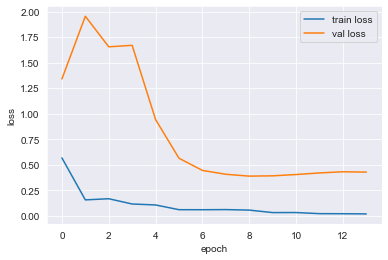

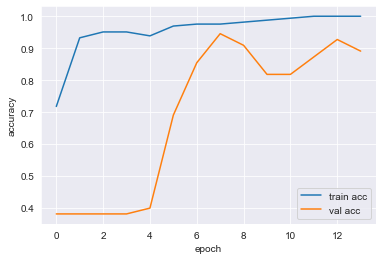

In [24]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.savefig('loss-graph.png')
plt.show()

# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('acc-graph.png')
plt.show()

In [64]:
#Test the model on train data  
preds = model.evaluate(x = x_train, y = y_train)

print ("Loss = " + str(preds[0]))
print ("Train Accuracy = " + str(preds[1]))
print()

#Test the model on validation data  
preds = model.evaluate(x = x_val, y = y_val)

print ("Loss = " + str(preds[0]))
print ("Validation Accuracy = " + str(preds[1]))
print()

#Test the model on test data  
preds = model.evaluate(x = x_test, y = y_test)

print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))
print()

6/6 [==============================] - 1s 107ms/step - loss: 0.4357 - accuracy: 0.9325
Loss = 0.43571677803993225
Train Accuracy = 0.9325153231620789

2/2 [==============================] - 0s 108ms/step - loss: 0.4276 - accuracy: 0.8909
Loss = 0.42755478620529175
Validation Accuracy = 0.8909090757369995

2/2 [==============================] - 0s 89ms/step - loss: 0.5191 - accuracy: 0.7963
Loss = 0.5191126465797424
Test Accuracy = 0.7962962985038757



              precision    recall  f1-score   support

       mamoa       0.89      0.94      0.91        34
   not_mamoa       0.89      0.81      0.85        21

    accuracy                           0.89        55
   macro avg       0.89      0.88      0.88        55
weighted avg       0.89      0.89      0.89        55



<AxesSubplot:>

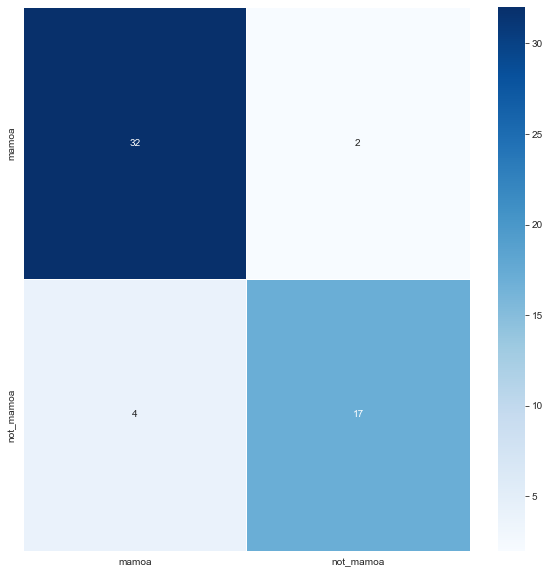

In [65]:
y_val_pred = model.predict(x_val)
#y_val_pred=np.argmax(y_val_pred, axis=1)
predict = []
for i in y_val_pred:
    if i[0] >= 0.5:
        predict.append(1)
    else:
        predict.append(0)
y_val_pred = np.array(predict)

target_names = ['mamoa', 'not_mamoa']
print(classification_report(y_val, y_val_pred, target_names = target_names))

conf_matrix = confusion_matrix(y_val, y_val_pred)
conf_matrix = pd.DataFrame(conf_matrix , index = ['0','1'] , columns = ['0','1'])
plt.figure(figsize = (10,10))
sns.heatmap(conf_matrix, cmap= "Blues", linewidth = 1 , annot = True, fmt='g',xticklabels = labels,yticklabels = labels)

              precision    recall  f1-score   support

       mamoa       0.69      0.91      0.78        22
   not mamoa       0.92      0.72      0.81        32

    accuracy                           0.80        54
   macro avg       0.80      0.81      0.80        54
weighted avg       0.83      0.80      0.80        54



<AxesSubplot:>

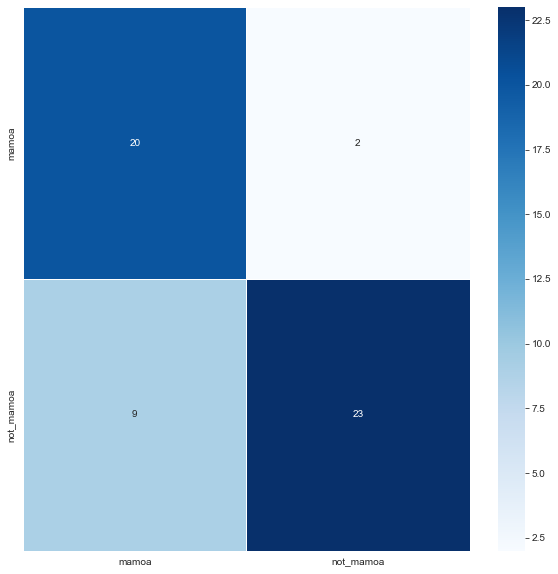

In [68]:
y_test_pred = model.predict(x_test)
#y_test_pred=np.argmax(y_test_pred, axis=1)
predict = []
for i in y_test_pred:
    if i[0] >= 0.5:
        predict.append(1)
    else:
        predict.append(0)
y_test_pred = np.array(predict)

target_names = ['mamoa', 'not mamoa']
print(classification_report(y_test, y_test_pred, target_names = target_names))

conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix = pd.DataFrame(conf_matrix , index = ['0','1'] , columns = ['0','1'])
plt.figure(figsize = (10,10))
sns.heatmap(conf_matrix, cmap= "Blues", linewidth = 1 , annot = True, fmt='g',xticklabels = labels,yticklabels = labels)